<a href="https://colab.research.google.com/github/suchetade2/suchetade2/blob/main/credit_default_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving credit_default.csv to credit_default.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("credit_default.csv")
display(df.head())

,Id,Credit Limit,SEX,EDUCATION,MARRIAGE,AGE,Age Group,Payment_Status_Sep,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment_Next
0,1,20000,2,2,1,24,<25,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,25-40,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,25-40,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,25-40,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,41-60,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(df.shape)
df.head()

(30000, 26)


,Id,Credit Limit,SEX,EDUCATION,MARRIAGE,AGE,Age Group,Payment_Status_Sep,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment_Next
0,1,20000,2,2,1,24,<25,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,25-40,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,25-40,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,25-40,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,41-60,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.columns = [col.strip().lower().replace('.', '_') for col in df.columns]

In [9]:
if 'default_payment_next' in df.columns:
  df.rename(columns={'default_payment_next':'default_next_month'},inplace=True)

In [10]:
print(df.isnull().sum())

id                    0
credit limit          0
sex                   0
education             0
marriage              0
age                   0
age group             0
payment_status_sep    0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
bill_amt1             0
bill_amt2             0
bill_amt3             0
bill_amt4             0
bill_amt5             0
bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
default_next_month    0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  30000 non-null  int64 
 1   credit limit        30000 non-null  int64 
 2   sex                 30000 non-null  int64 
 3   education           30000 non-null  int64 
 4   marriage            30000 non-null  int64 
 5   age                 30000 non-null  int64 
 6   age group           30000 non-null  object
 7   payment_status_sep  30000 non-null  int64 
 8   pay_2               30000 non-null  int64 
 9   pay_3               30000 non-null  int64 
 10  pay_4               30000 non-null  int64 
 11  pay_5               30000 non-null  int64 
 12  pay_6               30000 non-null  int64 
 13  bill_amt1           30000 non-null  int64 
 14  bill_amt2           30000 non-null  int64 
 15  bill_amt3           30000 non-null  int64 
 16  bill_amt4           30

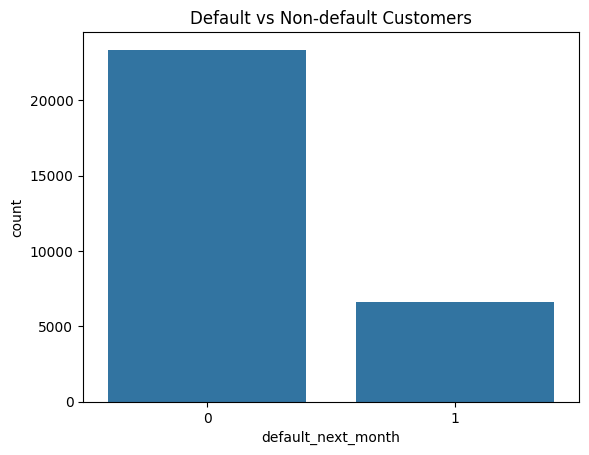

In [13]:
sns.countplot(x='default_next_month', data=df)
plt.title('Default vs Non-default Customers')
plt.show()

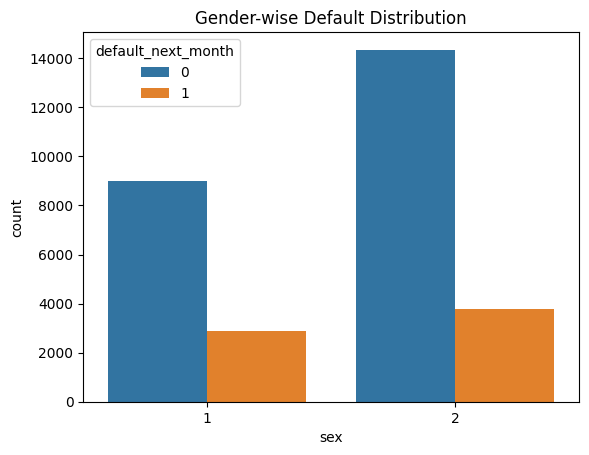

In [16]:
sns.countplot(x='sex', hue='default_next_month', data=df)
plt.title('Gender-wise Default Distribution')
plt.show()

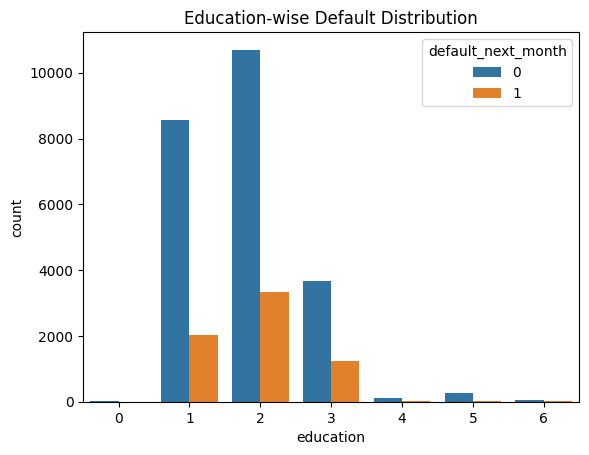

In [17]:
sns.countplot(x='education', hue='default_next_month', data=df)
plt.title('Education-wise Default Distribution')
plt.show()

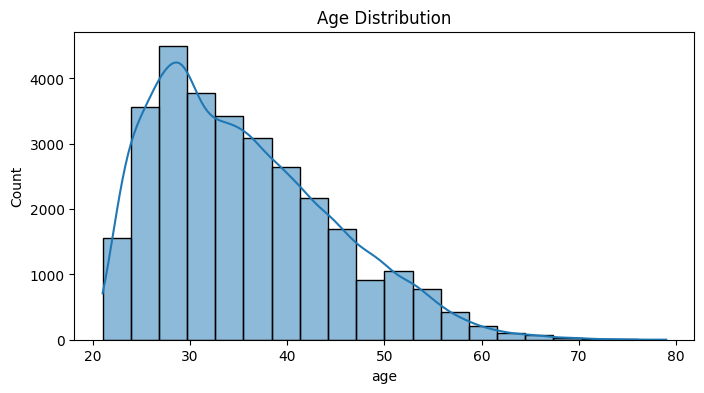

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

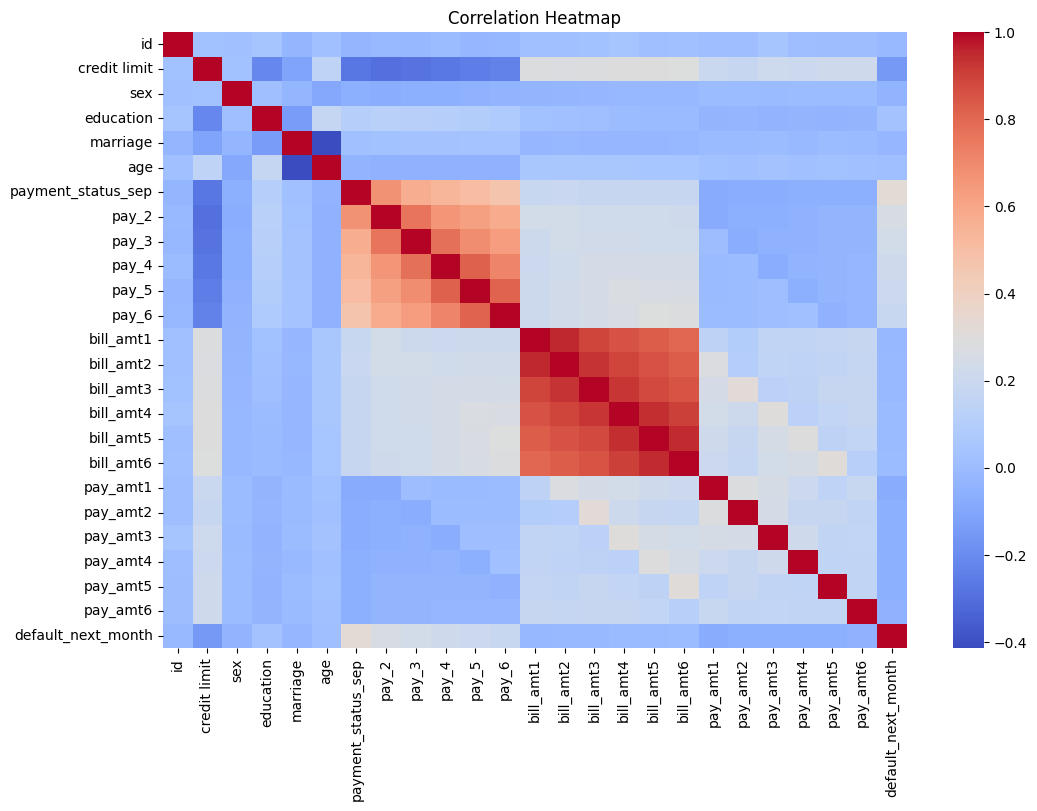

In [23]:
plt.figure(figsize=(12,8))
# Drop the 'age group' column as it contains non-numeric values
df_numeric = df.drop('age group', axis=1)
sns.heatmap(df_numeric.corr(), cmap='coolwarm',annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
bins = [0, 25, 35, 50, 100]
labels = ['<25', '25-35', '35-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [30]:
print(df.groupby('age_group')['credit limit'].mean())

age_group
<25       73763.885301
25-35    179268.820529
35-50    187378.655924
50+      164416.042309
Name: credit limit, dtype: float64


/tmp/ipython-input-3189658813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['credit limit'].mean())


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
X = df[['credit limit', 'age', 'sex', 'education', 'marriage']]
y = df['default_next_month']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7811666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


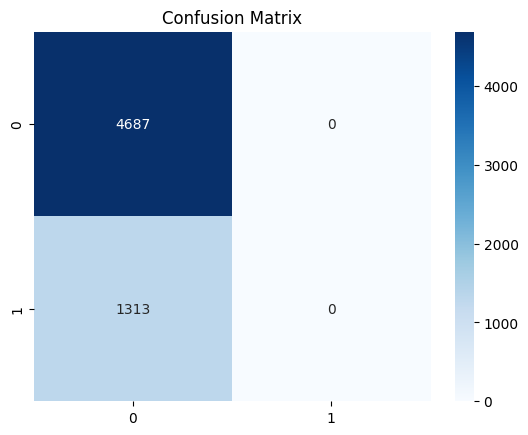

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [40]:
final_data = df[['credit limit', 'age_group', 'sex', 'education', 'marriage', 'default_next_month']]

In [41]:
final_data.to_csv("credit_default_cleaned_for_tableau.csv", index=False)
print("✅ File saved: credit_default_cleaned_for_tableau.csv")

✅ File saved: credit_default_cleaned_for_tableau.csv


In [42]:
from google.colab import files
files.download("credit_default_cleaned_for_tableau.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>